In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

C:\Users\Khushi\AppData\Roaming\Python\Python312\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.2)
  from scipy.stats import gaussian_kde


In [2]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### checking the missing value

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:
df.shape

(768, 9)

## Data imputation for 0's in every feature

target column[0,1]

binary classification works

In [9]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


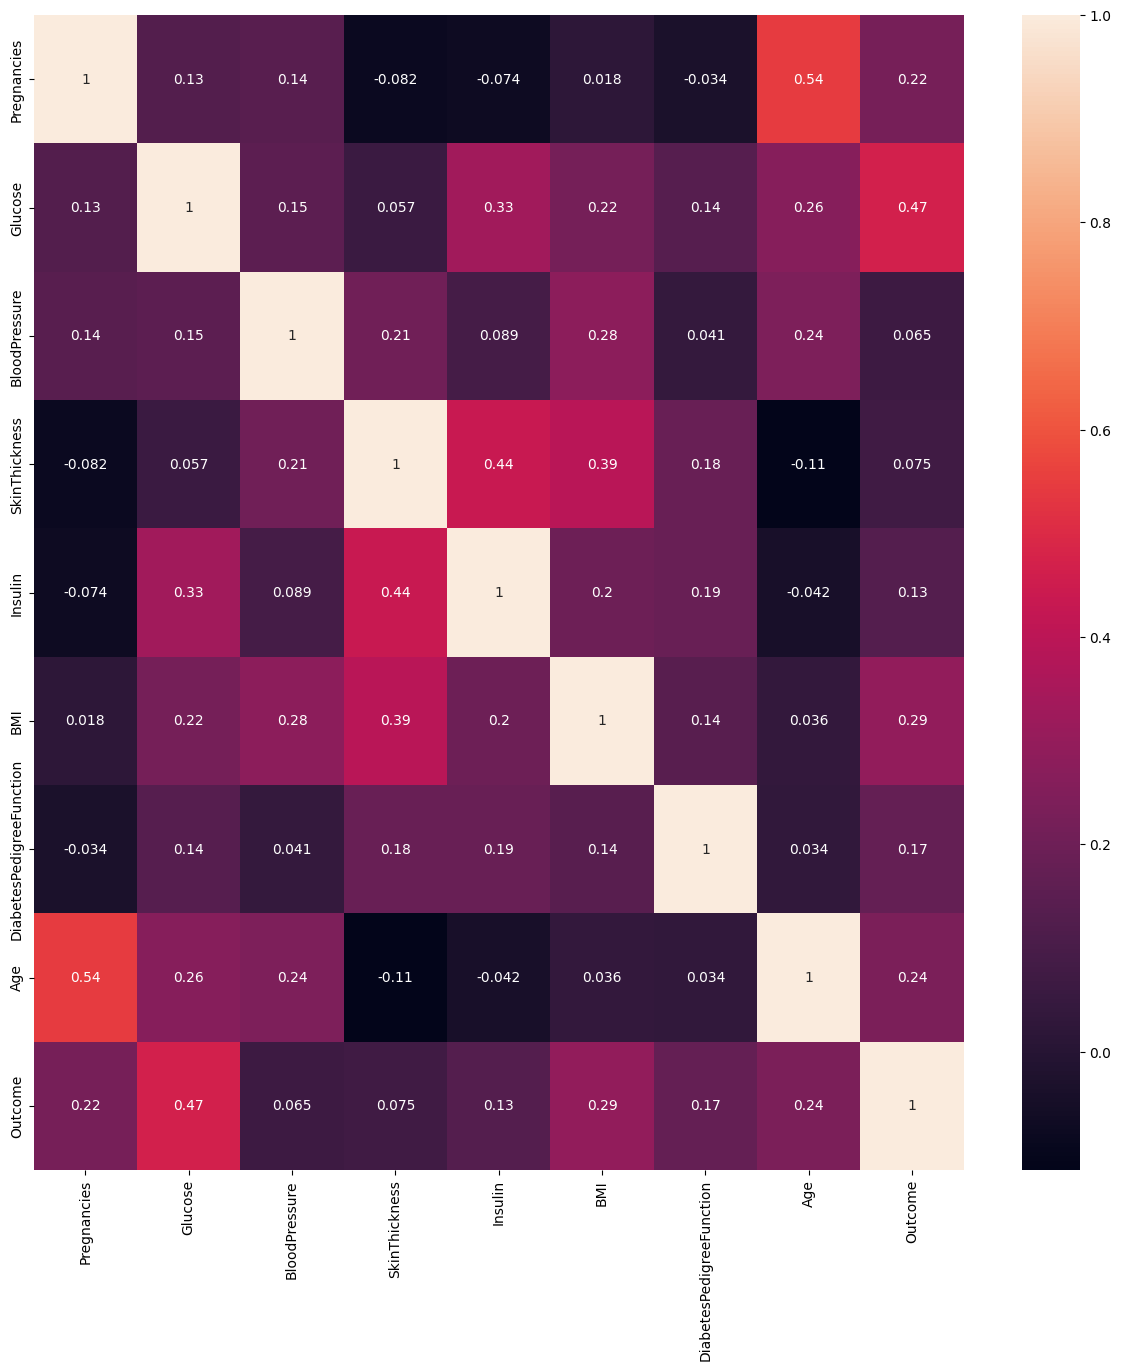

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 15))
ax = sns.heatmap(df.corr(), annot=True)
plt.savefig('correlation-coefficient.jpg')
plt.show()

### Data Imputation

### Removing outliers
#### Using Mean Median Mode

for numeric data median is more robust

C:\Users\Khushi\AppData\Local\Temp\ipykernel_19136\2719533762.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Pregnancies'])


<Axes: xlabel='Pregnancies', ylabel='Density'>

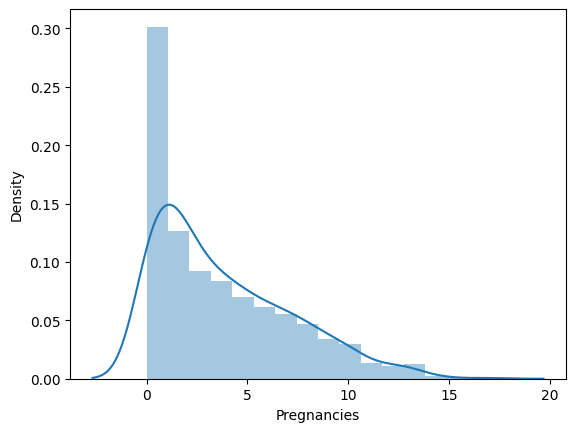

In [16]:
sns.distplot(df['Pregnancies'])

C:\Users\Khushi\AppData\Local\Temp\ipykernel_19136\2035962260.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Glucose)


<Axes: xlabel='Glucose', ylabel='Density'>

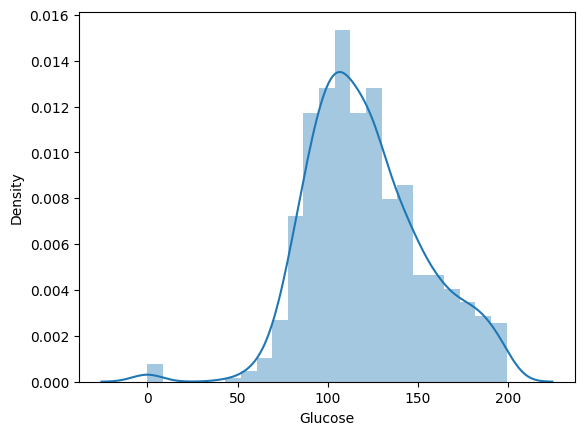

In [17]:
sns.distplot(df.Glucose)

In [18]:
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())

In [19]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,0,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,0,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,0,0,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,0,30.5,0.0,0.232,54,1


In [23]:
df['Pregnancies']=df['Pregnancies'].replace(0,df['Pregnancies'].median())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())
df['DiabetesPedigreeFunction']=df['DiabetesPedigreeFunction'].replace(0,df['DiabetesPedigreeFunction'].median())
df['Age']=df['Age'].replace(0,df['Age'].median())

In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,3,137,40,35,168.0,43.1,2.288,33,1


#### Normal distribution go for mean
#### Skewed distribution go for median

In [27]:
X=df.drop(columns='Outcome', axis=1)
y= df['Outcome']

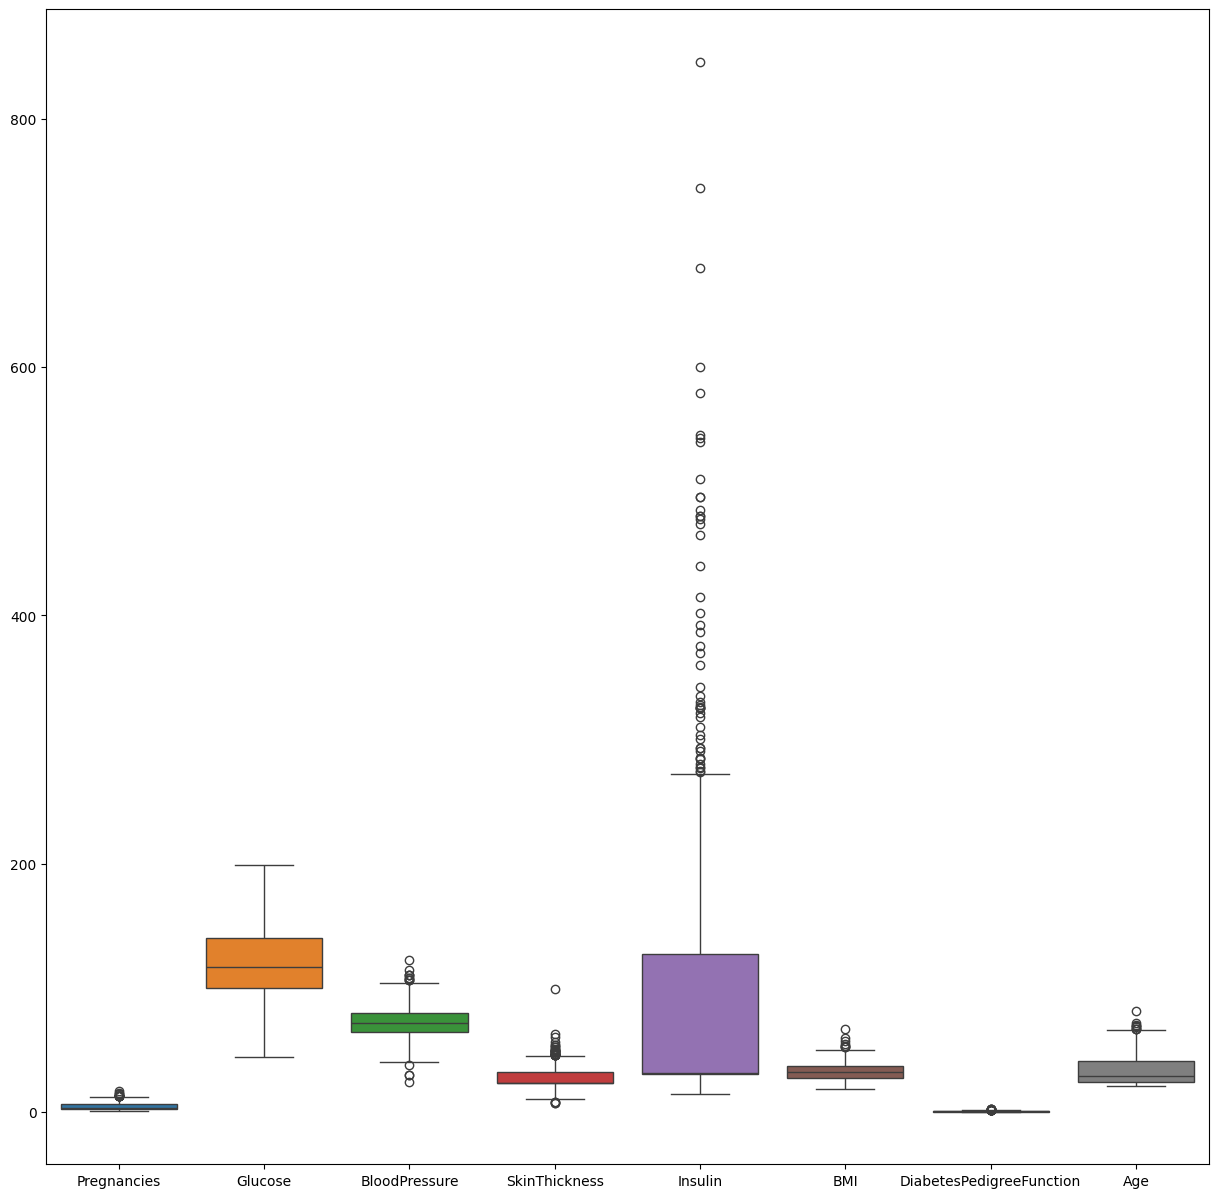

In [28]:
fig,ax=plt.subplots(figsize=(15, 15))
sns.boxplot(data=X, ax=ax)
plt.savefig('correlation-coefficient.jpg')
plt.show()

In [29]:
df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1


In [33]:
cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for col in cols:
    Q1= X[col].quantile(0.25)
    Q3= X[col].quantile(0.75)
    IQR= Q3- Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    mask=(x[col] >= lower_bound) & (x[col] <= upper_bound)

In [34]:
X_outlier_direction= X[mask]
y_outlier_direction=y[mask]

In [35]:
X_outlier_direction.shape

(759, 8)

In [37]:
y_outlier_direction.shape

(759,)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled= scaler.fit_transform(X_outlier_direction)

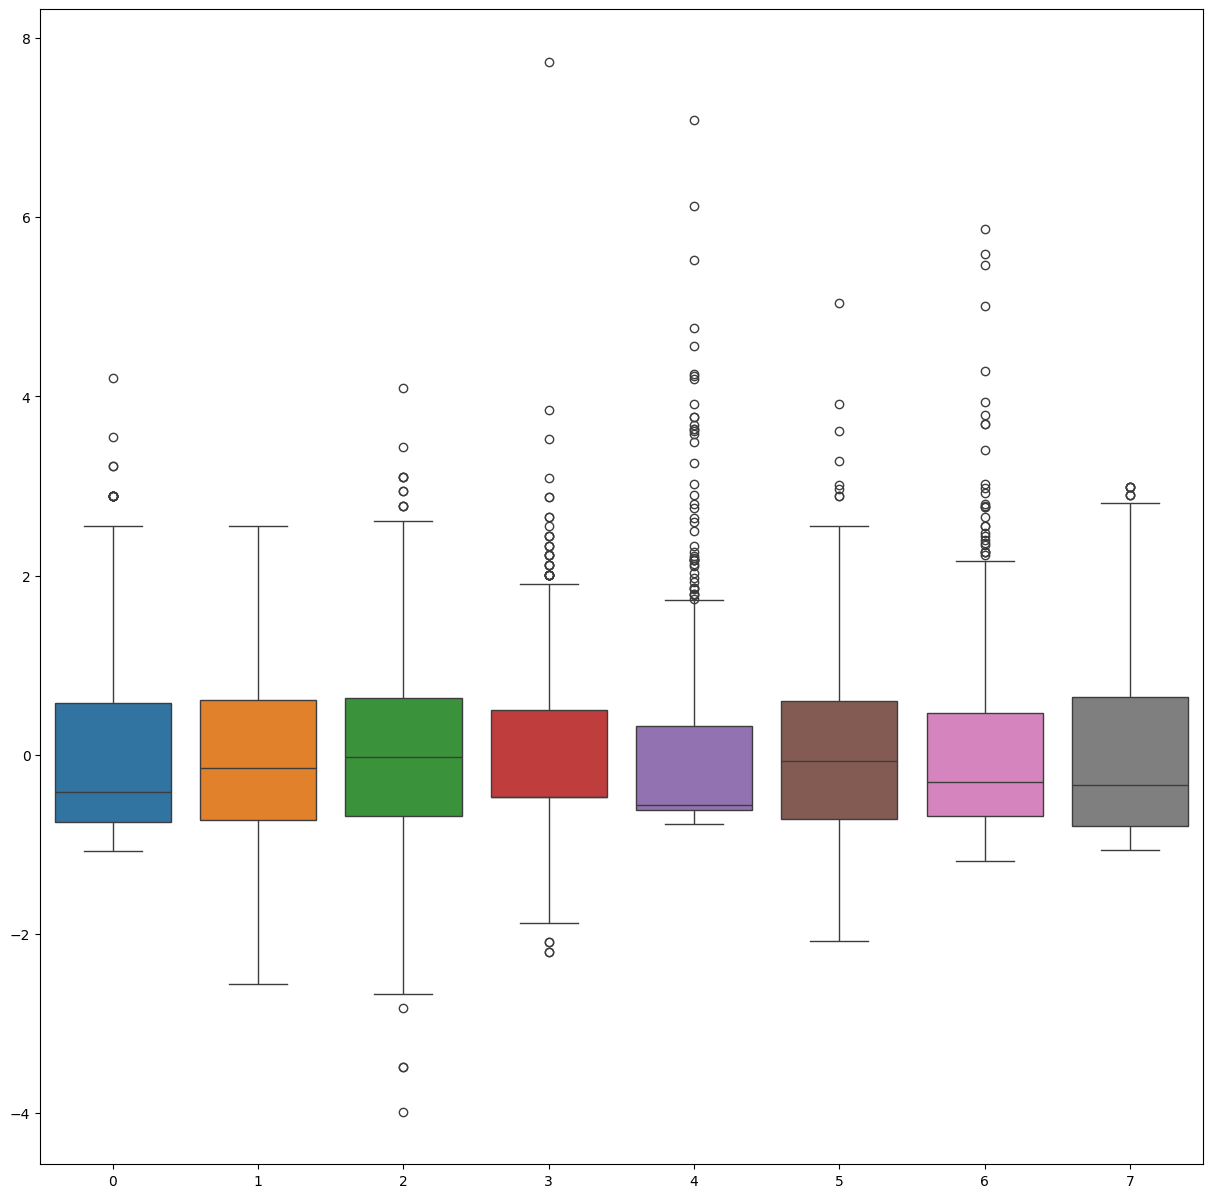

In [41]:
fig,ax=plt.subplots(figsize=(15, 15))
sns.boxplot(data=X_scaled, ax=ax)
plt.savefig('correlation-coefficient.jpg')
plt.show()

In [47]:
X_scaled=pd.DataFrame(X_scaled)
X_scaled.describe()

,0,1,2,3,4,5,6,7
count,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02
mean,1.029772e-16,2.176564e-16,-2.691450e-17,-1.509552e-16,-4.329724e-17,5.546727e-16,4.914821e-17,1.591466e-16
std,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00
min,-1.079800e+00,-2.557008e+00,-3.985285e+00,-2.200901e+00,-7.684941e-01,-2.081038e+00,-1.183313e+00,-1.062953e+00
25%,-7.491956e-01,-7.277108e-01,-6.872979e-01,-4.729631e-01,-6.126688e-01,-7.125819e-01,-6.852739e-01,-7.928253e-01
50%,-4.185912e-01,-1.509053e-01,-2.770048e-02,-4.729631e-01,-5.607270e-01,-7.202795e-02,-3.045975e-01,-3.426125e-01
75%,5.732217e-01,6.071820e-01,6.318969e-01,4.990017e-01,3.222827e-01,5.976421e-01,4.627740e-01,6.478556e-01
max,4.209869e+00,2.551840e+00,4.094783e+00,7.734740e+00,7.088876e+00,5.037846e+00,5.864467e+00,2.988962e+00


In [48]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [50]:
df.shape

(768, 9)

In [49]:
cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']


In [51]:
X_scaled.shape

(759, 8)

### splitting data training and testing

In [57]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(X_scaled, y_outlier_direction,test_size=0.33, random_state=42)

In [58]:
x_train.shape

(508, 8)

In [60]:
X_test.shape

(251, 8)

In [61]:
y_train.value_counts()

Outcome
0    328
1    180
Name: count, dtype: int64

In [64]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.6 MB 11.2 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/12.6 MB 3.4 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/12.6 MB 2.3 MB/s eta 0:00:05
   ---- ----------------------------------- 1.6/12.6 MB 2.0 MB/s eta 0:00:06
   ----- ---------------------------------- 1.8/12.6 MB 1.8 MB/s eta 0:00:07
   ------ --------------------------------- 2.1/12.6 MB 1.8 MB/s eta 0:00:06
   ------- -------------------------------- 2.4/12.6 MB 1.6 MB/s eta 0:00:07
   -------- ------------------------------- 2.6/12.6 MB 1.5 MB/s eta 0:00:07
   --------- ------------------------------ 2.9/12.6 MB 1.5 MB/s eta 0:00:07
   --------- ------------------------------ 2.9/12.6 MB 1.5 MB/s eta 0:00:07
   ---------- ----------------------------- 3.4/12.6 MB 1.4 MB/s eta 0:00:07
   -

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.17.0 requires numpy<2.0.0,>=1.26.0; python_version >= "3.12", but you have numpy 2.2.6 which is incompatible.
torchmetrics 1.5.1 requires numpy<2.0,>1.20.0, but you have numpy 2.2.6 which is incompatible.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_train_resampled, y_train_resampled= smote.fit_resample(x_train, y_train)

### Model development

In [67]:
from sklearn.linear_model import LogisticRegression
classification=LogisticRegression()
classification.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

### Model Prediction


In [69]:
y_prediction= classification.predict(X_test)
print(y_prediction)

[0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0
 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0
 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0]


In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_prediction)

0.7450199203187251

In [71]:
from sklearn.metrics import classification_report
target_names=['Non-Diabetic', 'Diabetic']
print(classification_report(y_test, y_prediction, target_names=target_names))

              precision    recall  f1-score   support

Non-Diabetic       0.81      0.79      0.80       165
    Diabetic       0.62      0.65      0.64        86

    accuracy                           0.75       251
   macro avg       0.72      0.72      0.72       251
weighted avg       0.75      0.75      0.75       251



### Save model for future use

In [75]:
import pickle
pickle.dump(classification, open("classification_model.pkl", "wb"))